<p><font size="6"><b>Spatial relationships and joins</b></font></p>

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

In [2]:
countries = geopandas.read_file("data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("data/ne_50m_rivers_lake_centerlines.zip")

## Spatial relationships

An important aspect of geospatial data is that we can look at *spatial relationships*: how two spatial objects relate to each other (whether they overlap, intersect, contain, .. one another).

The topological, set-theoretic relationships in GIS are typically based on the DE-9IM model. See https://en.wikipedia.org/wiki/Spatial_relation for more information.

![](img/TopologicSpatialRelarions2.png)
(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

### Relationships between individual objects

Let's first create some small toy spatial objects:

A polygon <small>(note: we use `.item()` here to to extract the scalar geometry object from the GeoSeries of length 1)</small>:

In [3]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].item()

Two points:

In [4]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].item()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].item()

And a linestring:

In [5]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

Let's visualize those 4 geometry objects together (I only put them in a GeoSeries to easily display them together with the geopandas `.plot()` method):

<AxesSubplot:>

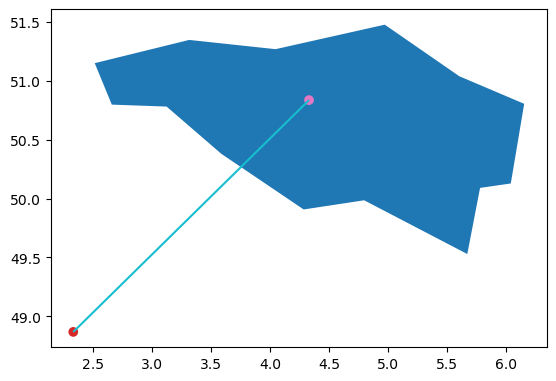

In [6]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

You can recognize the abstract shape of Belgium.

Brussels, the capital of Belgium, is thus located within Belgium. This is a spatial relationship, and we can test this using the individual shapely geometry objects as follow:

In [7]:
brussels.within(belgium)

True

And using the reverse, Belgium contains Brussels:

In [8]:
belgium.contains(brussels)

True

On the other hand, Paris is not located in Belgium:

In [9]:
belgium.contains(paris)

False

In [10]:
paris.within(belgium)

False

The straight line we draw from Paris to Brussels is not fully located within Belgium, but it does intersect with it:

In [11]:
belgium.contains(line)

False

In [12]:
line.intersects(belgium)

True

### Spatial relationships with GeoDataFrames

The same methods that are available on individual `shapely` geometries as we have seen above, are also available as methods on `GeoSeries` / `GeoDataFrame` objects.

For example, if we call the `contains` method on the world dataset with the `paris` point, it will do this spatial check for each country in the `world` dataframe:

In [13]:
countries.contains(paris)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

Because the above gives us a boolean result, we can use that to filter the dataframe:

In [14]:
countries[countries.contains(paris)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."


And indeed, France is the only country in the world in which Paris is located.

Another example, extracting the linestring of the Amazon river in South America, we can query through which countries the river flows:

In [15]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.item()

In [16]:
countries[countries.crosses(amazon)]  # or .intersects

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
22,BRA,Brazil,South America,207353391.0,3081000.0,"POLYGON ((-57.62513 -30.21629, -56.29090 -28.8..."
35,COL,Colombia,South America,47698524.0,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
124,PER,Peru,South America,31036656.0,410400.0,"POLYGON ((-69.52968 -10.95173, -68.66508 -12.5..."


<div class="alert alert-info" style="font-size:120%">

**REFERENCE**:

Overview of the different functions to check spatial relationships (*spatial predicate functions*):

* `equals`
* `contains`
* `crosses`
* `disjoint`
* `intersects`
* `overlaps`
* `touches`
* `within`
* `covers`
* `covered_by`


See https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships for an overview of those methods.

See https://en.wikipedia.org/wiki/DE-9IM for all details on the semantics of those operations.

</div>

## Let's practice!

We will again use the Paris datasets to exercise. Let's start importing them again, and directly converting both to the local projected CRS:

In [17]:
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("data/paris_bike_stations.geojson").to_crs(epsg=2154)

<div class="alert alert-success">

**EXERCISE: The Eiffel Tower**

The Eiffel Tower is an iron lattice tower built in the 19th century, and is probably the most iconic view of Paris.

The location of the Eiffel Tower is: x of 648237.3 and y of 6862271.9

* Create a Shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called `eiffel_tower`. Print the result.
* Check if the Eiffel Tower is located within the Montparnasse district (provided).
* Check if the Montparnasse district contains the bike station location.
* Calculate the distance between the Eiffel Tower and the bike station (note: in this case, the distance is returned in meters).


<details><summary>Hints</summary>

* The `Point` class is available in the `shapely.geometry` submodule
* Creating a point can be done by passing the x and y coordinates to the `Point()` constructor.
* The `within()` method checks if the object is located within the passed geometry (used as `geometry1.within(geometry2)`).
* The `contains()` method checks if the object contains the passed geometry (used as `geometry1.contains(geometry2)`).
* To calculate the distance between two geometries, the `distance()` method of one of the geometries can be used.

</details>

</div>

In [18]:
# Import the Point geometry
from shapely.geometry import Point

In [19]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(648237.3, 6862271.9)

In [20]:
# Print the result
print(eiffel_tower)

POINT (648237.3 6862271.9)


In [21]:
# Accessing the Montparnasse geometry (Polygon)
district_montparnasse = districts.loc[52, 'geometry']
bike_station = stations.loc[293, 'geometry']

In [22]:
# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

False


In [23]:
# Does the Montparnasse district contains the bike station?
print(district_montparnasse.contains(bike_station))

True


In [24]:
# The distance between the Eiffel Tower and the bike station?
print(eiffel_tower.distance(bike_station))

3540.1534488915263


<div class="alert alert-success">

**EXERCISE: In which district in the Eiffel Tower located?**

In previous exercise, we constructed a `Point` geometry for its location, and we checked that it was not located in the Montparnasse district. Let's now determine in which of the districts of Paris it *is* located.

* Create a boolean mask (or filter) indicating whether each district contains the Eiffel Tower or not. Call the result `mask`.
* Filter the `districts` dataframe with the boolean mask and print the result.


<details><summary>Hints</summary>

* To check for each polygon in the districts dataset if it contains a single point, we can use the `contains()` method of the `districts` GeoDataFrame.
* Filtering the rows of a DataFrame based on a condition can be done by passing the boolean mask into `df[..]`.

</details>

</div>

In [25]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(648237.3, 6862271.9)

In [26]:
# Create a boolean Series
mask = districts.contains(eiffel_tower)
mask

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [27]:
# Filter the districts with the boolean mask
districts[mask]

,id,district_name,population,geometry
27,28,Gros-Caillou,25156,"POLYGON ((649336.752 6861767.761, 649110.815 6..."


<div class="alert alert-success">

**EXERCISE: How far is the closest bike station?**

Now, we might be interested in the bike stations nearby the Eiffel Tower. To explore them, let's visualize the Eiffel Tower itself as well as the bikes stations within 1km.

To do this, we can calculate the distance to the Eiffel Tower for each of the stations. Based on this result, we can then create a mask that takes `True` if the station is within 1km, and `False` otherwise, and use it to filter the stations GeoDataFrame. Finally, we make a visualization of this subset.

* Calculate the distance to the Eiffel Tower for each station, and call the result `dist_eiffel`.
* Print the distance to the closest station (which is the minimum of `dist_eiffel`).
* Select the rows the `stations` GeoDataFrame where the distance to the Eiffel Tower is less than 1 km (note that the distance is in meters). Call the result `stations_eiffel`.

<details><summary>Hints</summary>

* The `.distance()` method of a GeoDataFrame works element-wise: it calculates the distance between each geometry in the GeoDataFrame and the geometry passed to the method.
* A Series has a `.min()` method to calculate the minimum value.
* To create a boolean mask based on a condition, we can do e.g. `s < 100`.

</details>

</div>

In [28]:
# The distance from each stations to the Eiffel Tower
dist_eiffel = stations.distance(eiffel_tower)

In [29]:
# The distance to the closest station
dist_eiffel.min()

232.34672323280478

In [30]:
# Filter the bike stations closer than 1 km
stations_eiffel = stations[dist_eiffel < 1000]

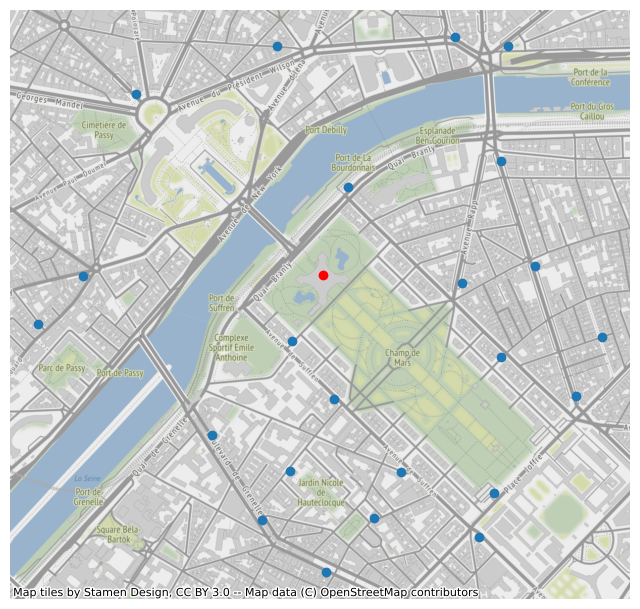

In [31]:
# Make a plot of the close-by bike stations using matplotlib and contextily
import matplotlib.pyplot as plt
import contextily

fig, ax = plt.subplots(figsize=(8, 8))
stations_eiffel.to_crs(epsg=3857).plot(ax=ax)
geopandas.GeoSeries([eiffel_tower], crs='EPSG:2154').to_crs(epsg=3857).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()

In [32]:
# Make a plot of the close-by bike stations using matplotlib and contextily
m = stations_eiffel.explore(marker_kwds=dict(radius=5))
geopandas.GeoSeries([eiffel_tower], crs='EPSG:2154').explore(m=m, color='red', marker_kwds=dict(radius=5))

---

## Spatial joins

In the previous section of this notebook, we could use the spatial relationship methods to check in which country a certain city was located. But what if we wanted to perform this same operation for every city and country? For example, we might want to know for each city in which country it is located.  

In tabular jargon, this would imply adding a column to our cities dataframe with the name of the country in which it is located. Since country name is contained in the countries dataset, we need to combine - or "join" - information from both datasets. Joining on location (rather than on a shared column) is called a "spatial join".

So here we will do:

- Based on the `countries` and `cities` dataframes, determine for each city the country in which it is located.
- To solve this problem, we will use the the concept of a "spatial join" operation: combining information of geospatial datasets based on their spatial relationship.

### Recap - joining dataframes

Pandas provides functionality to join or merge dataframes in different ways, see https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/ for an overview and https://pandas.pydata.org/pandas-docs/stable/merging.html for the full documentation.

To illustrate the concept of joining the information of two dataframes with pandas, let's take a small subset of our `cities` and `countries` datasets:

In [32]:
cities2 = cities[cities['name'].isin(['Bern', 'Brussels', 'London', 'Paris'])].copy()
cities2['iso_a3'] = ['CHE', 'BEL', 'GBR', 'FRA']

In [33]:
cities2

,name,geometry,iso_a3
26,Bern,POINT (7.46698 46.91668),CHE
170,Brussels,POINT (4.33137 50.83526),BEL
219,London,POINT (-0.11867 51.50194),GBR
235,Paris,POINT (2.33139 48.86864),FRA


In [34]:
countries2 = countries[['iso_a3', 'name', 'continent']]
countries2.head()

,iso_a3,name,continent
0,AFG,Afghanistan,Asia
1,AGO,Angola,Africa
2,ALB,Albania,Europe
3,ARE,United Arab Emirates,Asia
4,ARG,Argentina,South America


We added a 'iso_a3' column to the `cities` dataset, indicating a code of the country of the city. This country code is also present in the `countries` dataset, which allows us to merge those two dataframes based on the common column.

Joining the `cities` dataframe with `countries` will transfer extra information about the countries (the full name, the continent) to the `cities` dataframe, based on a common key:

In [35]:
cities2.merge(countries2, on='iso_a3')

,name_x,geometry,iso_a3,name_y,continent
0,Bern,POINT (7.46698 46.91668),CHE,Switzerland,Europe
1,Brussels,POINT (4.33137 50.83526),BEL,Belgium,Europe
2,London,POINT (-0.11867 51.50194),GBR,United Kingdom,Europe
3,Paris,POINT (2.33139 48.86864),FRA,France,Europe


**But** for this illustrative example we added the common column manually, it is not present in the original dataset. However, we can still know how to join those two datasets based on their spatial coordinates.

### Recap - spatial relationships between objects

In the previous section, we have seen the notion of spatial relationships between geometry objects: within, contains, intersects, ...

In this case, we know that each of the cities is located *within* one of the countries, or the other way around that each country can *contain* multiple cities.

We can test such relationships using the methods we have seen in the previous notebook:

In [36]:
france = countries.loc[countries['name'] == 'France', 'geometry'].squeeze()

In [37]:
cities.within(france)

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool

The above gives us a boolean series, indicating for each point in our `cities` dataframe whether it is located within the area of France or not.  
Because this is a boolean series as result, we can use it to filter the original dataframe to only show those cities that are actually within France:

In [38]:
cities[cities.within(france)]

,name,geometry
10,Monaco,POINT (7.40691 43.73965)
13,Andorra,POINT (1.51649 42.50000)
186,Geneva,POINT (6.14003 46.21001)
235,Paris,POINT (2.33139 48.86864)


We could now repeat the above analysis for each of the countries, and add a column to the `cities` dataframe indicating this country. However, that would be tedious to do manually, and is also exactly what the spatial join operation provides us.

*(note: the above result is incorrect, but this is just because of the coarse-ness of the countries dataset)*

## Spatial join operation

<div class="alert alert-info" style="font-size:120%">

**SPATIAL JOIN** = *transferring attributes from one layer to another based on their spatial relationship* <br>


Different parts of this operations:

* The GeoDataFrame to which we want add information
* The GeoDataFrame that contains the information we want to add
* The spatial relationship we want to use to match both datasets ('intersects', 'contains', 'within')
* The type of join: left or inner join


![](img/illustration-spatial-join.svg)

</div>

In this case, we want to join the `cities` dataframe with the information of the `countries` dataframe, based on the spatial relationship between both datasets.

We use the [`geopandas.sjoin`](http://geopandas.readthedocs.io/en/latest/reference/geopandas.sjoin.html) function:

In [39]:
joined = geopandas.sjoin(cities, countries, predicate='within', how='left')

In [40]:
joined

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,6.213780e+07,2221000.0
1,San Marino,POINT (12.44177 43.93610),79.0,ITA,Italy,Europe,6.213780e+07,2221000.0
2,Vaduz,POINT (9.51667 47.13372),9.0,AUT,Austria,Europe,8.754413e+06,416600.0
3,Lobamba,POINT (31.20000 -26.46667),152.0,SWZ,Swaziland,Africa,1.467152e+06,11060.0
4,Luxembourg,POINT (6.13000 49.61166),97.0,LUX,Luxembourg,Europe,5.941300e+05,58740.0
...,...,...,...,...,...,...,...,...
238,Rio de Janeiro,POINT (-43.22697 -22.92308),22.0,BRA,Brazil,South America,2.073534e+08,3081000.0
239,São Paulo,POINT (-46.62697 -23.55673),22.0,BRA,Brazil,South America,2.073534e+08,3081000.0
240,Sydney,POINT (151.18323 -33.91807),8.0,AUS,Australia,Oceania,2.323241e+07,1189000.0
241,Singapore,POINT (103.85387 1.29498),111.0,MYS,Malaysia,Asia,3.138199e+07,863000.0


In [41]:
joined[joined["name_right"] == "France"]

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
10,Monaco,POINT (7.40691 43.73965),55.0,FRA,France,Europe,67106161.0,2699000.0
13,Andorra,POINT (1.51649 42.50000),55.0,FRA,France,Europe,67106161.0,2699000.0
186,Geneva,POINT (6.14003 46.21001),55.0,FRA,France,Europe,67106161.0,2699000.0
235,Paris,POINT (2.33139 48.86864),55.0,FRA,France,Europe,67106161.0,2699000.0


In [42]:
joined['continent'].value_counts()

Asia             59
Africa           57
Europe           46
North America    26
South America    14
Oceania           8
Name: continent, dtype: int64

## Let's practice!

We will again use the Paris datasets to do some exercises. Let's start importing them:

In [43]:
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("data/paris_bike_stations.geojson").to_crs(epsg=2154)

<div class="alert alert-success">

**EXERCISE:**

* Determine for each bike station in which district it is located (using a spatial join!). Call the result `joined`.

<details><summary>Hints</summary>

- The `geopandas.sjoin()` function takes as first argument the dataframe to which we want to add information, and as second argument the dataframe that contains this additional information.

</details>

</div>

In [44]:
joined = geopandas.sjoin(stations, districts[['district_name', 'geometry']], predicate='within')

In [45]:
joined.head()

,name,bike_stands,available_bikes,geometry,index_right,district_name
0,14002 - RASPAIL QUINET,44,4,POINT (650791.111 6860114.328),52,Montparnasse
143,14112 - FAUBOURG SAINT JACQUES CASSINI,16,0,POINT (651406.382 6859738.689),52,Montparnasse
293,14033 - DAGUERRE GASSENDI,38,1,POINT (650694.991 6859723.873),52,Montparnasse
346,14006 - SAINT JACQUES TOMBE ISSOIRE,22,0,POINT (651327.035 6859441.637),52,Montparnasse
429,14111 - DENFERT-ROCHEREAU CASSINI,24,8,POINT (651261.351 6859926.893),52,Montparnasse


<div class="alert alert-success">

**EXERCISE: Map of tree density by district (I)**

Using a dataset of all trees in public spaces in Paris, the goal is to make a map of the tree density by district. We first need to find out how many trees each district contains, which we will do in this exercise. In the following exercise, we will use this result to calculate the density and create a map.

To obtain the tree count by district, we first need to know in which district each tree is located, which we can do with a spatial join. Then, using the result of the spatial join, we will calculate the number of trees located in each district using the pandas 'group-by' functionality.

- Import the trees dataset `"paris_trees.gpkg"` and call the result `trees`. Also read the districts dataset we have seen previously (`"paris_districts.geojson"`), and call this `districts`. Convert the districts dataset to the same CRS as the trees dataset.
- Add a column with the `'district_name'` to the trees dataset using a spatial join. Call the result `joined`.

<details><summary>Hints</summary>

- Remember, we can perform a spatial join with the `geopandas.sjoin()` function.
- `geopandas.sjoin()` takes as first argument the dataframe to which we want to add information, and as second argument the dataframe that contains this additional information.
- The `op` argument is used to specify which spatial relationship between both dataframes we want to use for joining (options are `'intersects'`, `'contains'`, `'within'`).

</details>

</div>

In [46]:
# Read the trees and districts data
trees = geopandas.read_file("data/paris_trees.gpkg")
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(trees.crs)

In [47]:
# The trees dataset with point locations of trees
trees.head()

,species,location_type,geometry
0,Marronnier,Alignement,POINT (455834.122 5410780.606)
1,Marronnier,Alignement,POINT (446546.284 5412574.697)
2,Marronnier,Alignement,POINT (449768.283 5409876.557)
3,Marronnier,Alignement,POINT (451779.708 5409292.071)
4,Sophora,Alignement,POINT (447041.361 5409756.712)


In [48]:
# Spatial join of the trees and districts datasets
joined = geopandas.sjoin(trees, districts, predicate='within')
joined.head()

,species,location_type,geometry,index_right,id,district_name,population
0,Marronnier,Alignement,POINT (455834.122 5410780.606),43,44,Sainte-Marguerite,36476
130,Micocoulier,Alignement,POINT (455458.848 5411310.443),43,44,Sainte-Marguerite,36476
142,Platane,Alignement,POINT (455704.681 5410991.067),43,44,Sainte-Marguerite,36476
402,Cedrele,Alignement,POINT (455538.223 5411112.314),43,44,Sainte-Marguerite,36476
428,Micocoulier,Alignement,POINT (455487.563 5411285.863),43,44,Sainte-Marguerite,36476


<div class="alert alert-success">

**EXERCISE: Map of tree density by district (II)**

Calculate the number of trees located in each district: group the `joined` DataFrame by the `'district_name'` column, and calculate the size of each group. Call the resulting Series `trees_by_district`.  <br>

We then convert `trees_by_district` to a DataFrame for the next exercise.

<details><summary>Hints</summary>

- The general group-by syntax in pandas is: `df.groupby('key').aggregation_method()`, substituting 'key' and 'aggregation_method' with the appropriate column name and method. 
- To know the size of groups, we can use the `.size()` method.

</details>

</div>

In [49]:
# Calculate the number of trees in each district
trees_by_district = joined.groupby('district_name').size()

In [50]:
# Convert the series to a DataFrame and specify column name
trees_by_district = trees_by_district.to_frame(name='n_trees')

In [51]:
# Inspect the result
trees_by_district.head()

,n_trees
district_name,
Amérique,183
Archives,8
Arsenal,60
Arts-et-Metiers,20
Auteuil,392


<div class="alert alert-success">

**EXERCISE: Map of tree density by district (III)**

Now we have obtained the number of trees by district, we can make the map of the districts colored by the tree density.

For this, we first need to merge the number of trees in each district we calculated in the previous step (`trees_by_district`) back to the districts dataset. We will use the [`pd.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) function to join two dataframes based on a common column.

Since not all districts have the same size, we should compare the tree density for the visualisation: the number of trees relative to the area.

- Use the `pd.merge()` function to merge `districts` and `trees_by_district` dataframes on the `'district_name'` column. Call the result `districts_trees`.
- Add a column `'n_trees_per_area'` to the `districts_trees` dataframe, based on the `'n_trees'` column divided by the area.
- Make a plot of the `districts_trees` dataframe, using the `'n_trees_per_area'` column to determine the color of the polygons.


<details><summary>Hints</summary>

- The pandas `pd.merge()` function takes the two dataframes you want to merge as the first two arguments.
- The column name on which you want to merge both datasets can be specified with the `on` keyword.
- Accessing a column of a DataFrame can be done with `df['col']`, while adding a column to a DataFrame can be done with `df['new_col'] = values` where `values` can be the result of a computation.
- Remember, the area of each geometry in a GeoSeries or GeoDataFrame can be retrieved using the `area` attribute. So considering a GeoDataFrame `gdf`, then `gdf.geometry.area` will return a Series with the area of each geometry.
- We can use the `.plot()` method of a GeoDataFrame to make a visualization of the geometries. 
- For using one of the columns of the GeoDataFrame to determine the fill color, use the `column=` keyword.


</details>

</div>

In [52]:
# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts, trees_by_district, on='district_name')
districts_trees.head()

,id,district_name,population,geometry,n_trees
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",40
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",40
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",4
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",7
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7


In [53]:
# Add a column with the tree density
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area

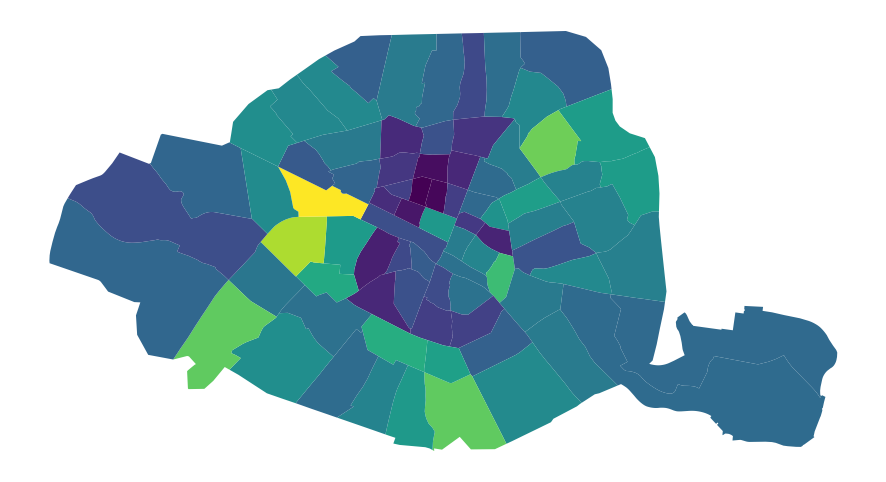

In [54]:
# Make of map of the districts colored by 'n_trees_per_area'
ax = districts_trees.plot(column='n_trees_per_area', figsize=(12, 6))
ax.set_axis_off()